In [1]:
# import matplotlib to draw plot inside of notebook
%matplotlib inline

# import required libraries to munge data
import pandas as pd
import numpy as np
import os

from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
learning_rate_table = pd.read_csv("../../log/learning_rate_test.csv", header=0)
learning_rate_table.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Msec,Step,Epoch,Elapsed Time,Test Error,Validation Error,Training Error,BASE_LEARNING_RATE
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,0.0,336.000000
mean,509.133929,9408.095238,10.952381,58.183750,0.018376,0.017143,NaN,0.023325
std,294.670537,5144.426313,5.988855,31.676043,0.018079,0.021842,NaN,0.032977
min,1.000000,859.000000,1.000000,5.250000,0.006000,0.000200,NaN,0.000100
25%,236.000000,5154.000000,6.000000,31.650000,0.008400,0.002800,NaN,0.000875
50%,512.500000,9449.000000,11.000000,58.500000,0.012500,0.010000,NaN,0.007500
75%,757.250000,13744.000000,16.000000,86.125000,0.019750,0.020900,NaN,0.027500
max,997.000000,17180.000000,20.000000,112.000000,0.154000,0.165000,NaN,0.100000


In [3]:
learning_rate_table.head(10)

,Timestamp,Msec,Setting,Measure Type,Step,Epoch,Elapsed Time,Test Error,Validation Error,Training Error,BASE_LEARNING_RATE,USE_LEARNING_RATE_DECAY
0,2016-11-09 03:47:41,817,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,859,1.0,6.36,0.0459,0.0576,NaN,0.1,True
1,2016-11-09 03:47:46,797,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,1718,2.0,11.30,0.0337,0.0462,NaN,0.1,True
2,2016-11-09 03:47:51,842,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,2577,3.0,16.40,0.0209,0.0204,NaN,0.1,True
3,2016-11-09 03:47:56,863,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,3436,4.0,21.40,0.0184,0.0130,NaN,0.1,True
4,2016-11-09 03:48:01,920,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,4295,5.0,26.50,0.0148,0.0156,NaN,0.1,True
5,2016-11-09 03:48:06,929,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,5154,6.0,31.50,0.0148,0.0128,NaN,0.1,True
6,2016-11-09 03:48:11,973,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,6013,7.0,36.50,0.0137,0.0090,NaN,0.1,True
7,2016-11-09 03:48:17,13,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,6872,8.0,41.60,0.0154,0.0124,NaN,0.1,True
8,2016-11-09 03:48:22,93,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,7731,9.0,46.60,0.0130,0.0114,NaN,0.1,True
9,2016-11-09 03:48:27,139,/root/tf-hpolib/tf-hpo/src/config/HPV_14786308...,epoch,8590,10.0,51.70,0.0130,0.0062,NaN,0.1,True


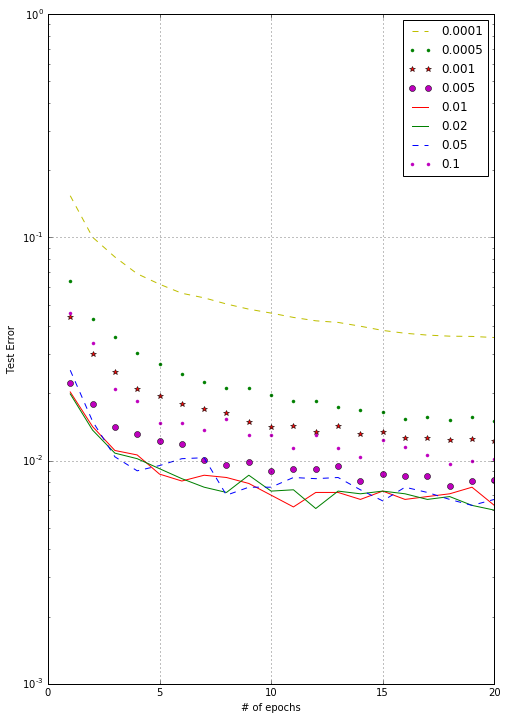

In [11]:
# poorly written learning rate change plotting code (refactoring required)
without_decay_table = learning_rate_table[learning_rate_table["USE_LEARNING_RATE_DECAY"] == False]
with_decay_table = learning_rate_table[learning_rate_table["USE_LEARNING_RATE_DECAY"] == True]
epoch_table = without_decay_table[without_decay_table["Measure Type"] == "epoch"]
fig = plt.figure(num=None, figsize=(8, 12), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
markers = ["y--", "g.", "r*", "mo", "r-", "g-", "b--", "m."]
#learning_rates = sorted(list(set(epoch_table["BASE_LEARNING_RATE"])))
#index = 0
#for learning_rate in learning_rates:
#    subset_table = epoch_table[epoch_table["BASE_LEARNING_RATE"] == learning_rate]
#    ax.semilogy(subset_table["Epoch"], subset_table["Test Error"], markers[index], label=learning_rate)
#    ax.set_title("without learning rate decay")
#    ax.set_xlabel("# of epochs")
#    ax.grid(True)
#    index += 1 

epoch_table = with_decay_table[with_decay_table["Measure Type"] == "epoch"]
#ax = fig.add_subplot(122)
markers = ["y--", "g.", "r*", "mo", "r-", "g-", "b--", "m."]
learning_rates = sorted(list(set(epoch_table["BASE_LEARNING_RATE"])))
index = 0
for learning_rate in learning_rates:
    subset_table = epoch_table[epoch_table["BASE_LEARNING_RATE"] == learning_rate]
    ax.semilogy(subset_table["Epoch"], subset_table["Test Error"], markers[index], label=learning_rate)
#    ax.set_title("with learning rate decay (0.95)")
    ax.set_xlabel("# of epochs")
    ax.grid(True)
    index += 1 
plt.ylabel("Test Error")
plt.legend(loc="upper right")
#title = "Test Errors When Learning Rate Chages"
#plt.suptitle(title)
plt.show()
fig.savefig("learning_rate.png", format='png', dpi=100, show=False, bbox_inches='tight')

In [8]:
regularization_table = pd.read_csv("../../log/regularization_test.csv", header=0)
regularization_table.describe()

,Msec,Step,Epoch,Elapsed Time,Test Error,Validation Error,Training Error,REGULARIZER_FACTOR
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.00000,0.0,420.000000
mean,488.135714,9408.095238,10.952381,59.003238,0.020197,0.01950,NaN,0.077953
std,289.213159,5142.891351,5.987068,31.495418,0.021855,0.02713,NaN,0.146973
min,1.000000,859.000000,1.000000,6.250000,0.005900,0.00020,NaN,0.000000
25%,239.750000,5154.000000,6.000000,32.375000,0.007300,0.00180,NaN,0.000088
50%,493.000000,9449.000000,11.000000,59.100000,0.009100,0.00570,NaN,0.000650
75%,741.750000,13744.000000,16.000000,86.900000,0.026150,0.02985,NaN,0.062500
max,991.000000,17180.000000,20.000000,110.000000,0.139300,0.14240,NaN,0.500000


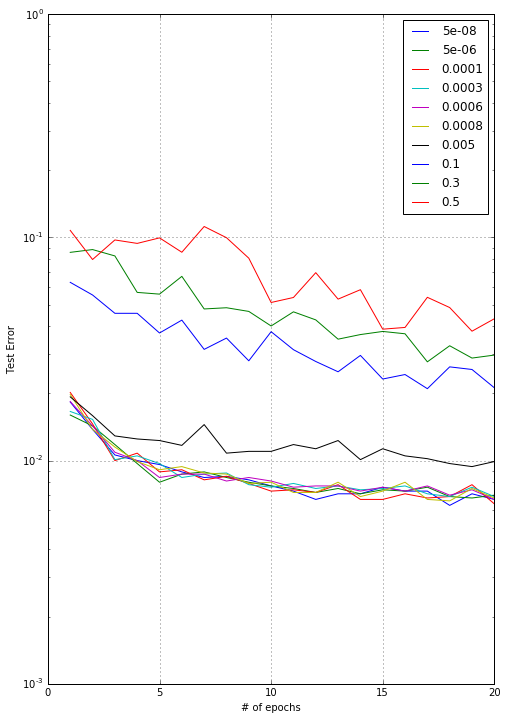

In [23]:
epoch_table = regularization_table[regularization_table["Measure Type"] == "epoch"]
all_factors = sorted(list(set(epoch_table["REGULARIZER_FACTOR"])))
# select partial item only
reg_factors = []
for i in range(len(all_factors)):
    if i % 2 == 1:
        reg_factors.append(all_factors[i])
fig = plt.figure(num=None, figsize=(8, 12), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
index = 0
for reg_factor in reg_factors:
    subset_table = epoch_table[epoch_table["REGULARIZER_FACTOR"] == reg_factor]
    ax.semilogy(subset_table["Epoch"], subset_table["Test Error"], label=reg_factor)
    ax.set_xlabel("# of epochs")
    ax.grid(True)
    index += 1
plt.ylabel("Test Error")
plt.legend(loc="upper right")
title = "Test Errors When Regularization Factor Chages"
#plt.suptitle(title)
plt.show()
fig.savefig("regularization_factor.png", format='png', dpi=100, show=False, bbox_inches='tight')

In [14]:
dropout_table = pd.read_csv("../../log/dropout_test.csv", header=0)
dropout_table.describe()

,Msec,Step,Epoch,Elapsed Time,Test Error,Validation Error,Training Error,DROPOUT_RATE
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,0.0,210.000000
mean,503.457143,9408.095238,10.952381,60.933524,0.009766,0.006263,NaN,0.500000
std,284.614909,5149.039460,5.994225,31.737981,0.003560,0.006697,NaN,0.269902
min,0.000000,859.000000,1.000000,7.940000,0.005800,0.000000,NaN,0.100000
25%,251.750000,5154.000000,6.000000,34.800000,0.007800,0.001200,NaN,0.250000
50%,502.000000,9449.000000,11.000000,61.400000,0.008700,0.004200,NaN,0.500000
75%,765.000000,13744.000000,16.000000,88.225000,0.010000,0.008500,NaN,0.750000
max,996.000000,17180.000000,20.000000,111.000000,0.033800,0.044200,NaN,0.900000


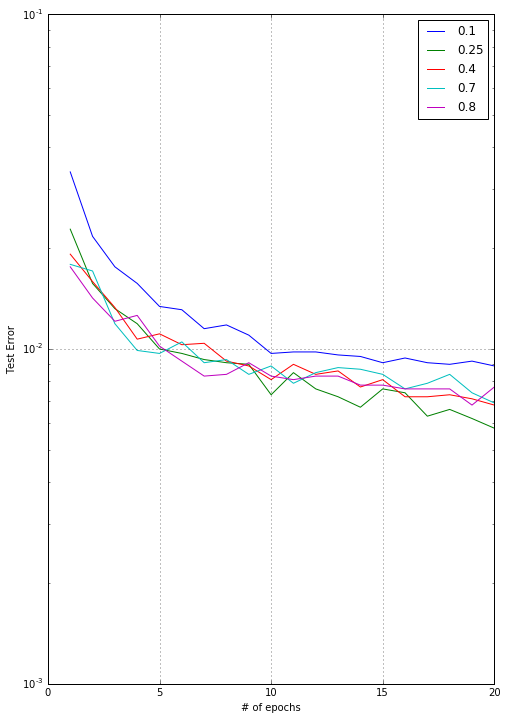

In [24]:
epoch_table = dropout_table[dropout_table["Measure Type"] == "epoch"]
all_dropouts = sorted(list(set(epoch_table["DROPOUT_RATE"])))
# select partial item only
dropouts = []
for i in range(len(all_dropouts)):
    if i % 2 == 0:
        dropouts.append(all_dropouts[i])
fig = plt.figure(num=None, figsize=(8, 12), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
index = 0
for dropout in dropouts:
    subset_table = epoch_table[epoch_table["DROPOUT_RATE"] == dropout]
    ax.semilogy(subset_table["Epoch"], subset_table["Test Error"], label=dropout)
    ax.set_xlabel("# of epochs")
    ax.grid(True)
    index += 1
plt.ylabel("Test Error")
plt.legend(loc="upper right")
title = "Test Errors When Dropout Rate Chages"
#plt.suptitle(title)
plt.show()
fig.savefig("dropout.png", format='png', dpi=100, show=False, bbox_inches='tight')

In [26]:
sample_table = pd.read_csv("../../log/correlation.csv", header=0)
epoch_table = sample_table[sample_table["Measure Type"] == "epoch"]
epoch_table.head(3)

,Timestamp,Msec,Setting,Measure Type,Step,Epoch,Elapsed Time,Test Error,Validation Error,Training Error,BASE_LEARNING_RATE,CONV1_DEPTH,CONV2_DEPTH,DROPOUT_RATE,FC1_WIDTH,FILTER_SIZE,REGULARIZER_FACTOR
0,2016-11-29 21:08:16,206,/root/tf-hpolib/tf-hpo/src/.config/HPV_1480419...,epoch,859,1.0,8.15,0.8990,0.8922,NaN,0.1,50,50,0.25,896,3,0.00005
1,2016-11-29 21:08:16,230,/root/tf-hpolib/tf-hpo/src/.config/HPV_1480419...,epoch,859,1.0,8.17,0.8972,0.8960,NaN,0.1,50,50,0.75,896,3,0.02500
2,2016-11-29 21:08:16,233,/root/tf-hpolib/tf-hpo/src/.config/HPV_1480419...,epoch,859,1.0,8.17,0.8990,0.8922,NaN,0.1,50,50,0.75,896,3,0.00005


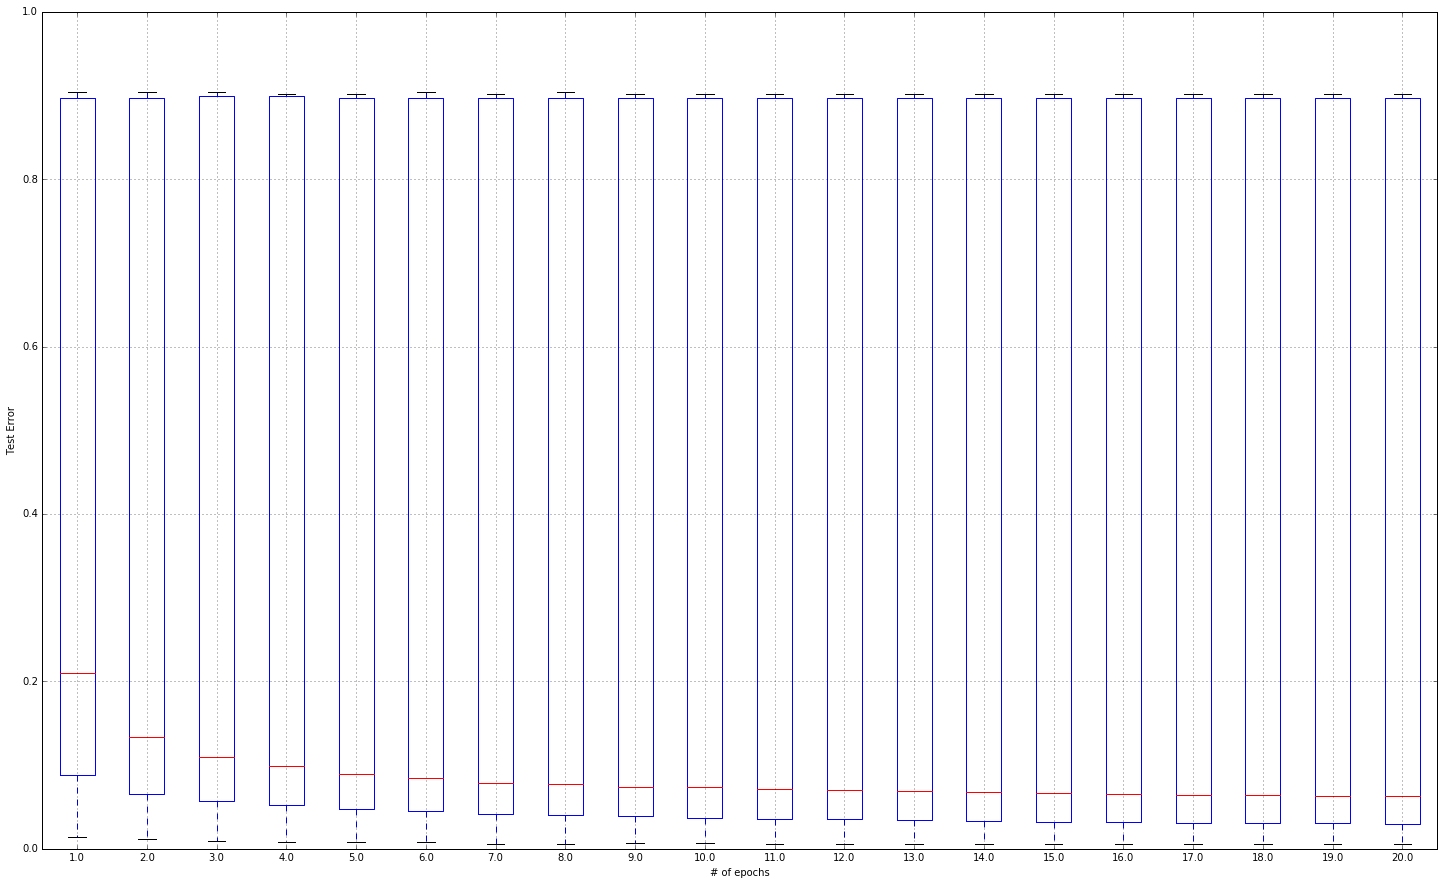

In [27]:
fig = plt.figure(num=None, figsize=(25, 15), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
box_list = []
epochs = sorted(list(set(epoch_table["Epoch"])))
for epoch in epochs:
    box_table = epoch_table[epoch_table["Epoch"] == epoch]
    box_list.append(box_table["Test Error"])
ax.boxplot(box_list)
ax.grid(True)
ax.set_xticklabels(epochs)
ax.set_xlabel("# of epochs")
plt.ylabel("Test Error")
#title = "Test Errors When Regularization Hyperparameters Combined"
#plt.suptitle(title)
plt.show()
fig.savefig("LR_mix_test.png", format='png', dpi=100, show=False, bbox_inches='tight')